# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [11]:
# Import libraries necessary for this project

import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [8]:
# Looking at the datasets
print prices.head()
print features.head()
#print data.head()

# TODO: Minimum price of the data
#minimum_price = prices.min()
## Using numpy!
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

#######################################################
#### Additional Statistics for Final Conclusions
min_RM = np.min(features.RM)
max_RM = np.max(features.RM)
mean_RM = np.mean(features.RM)
median_RM = np.median(features.RM)
std_RM = np.std(features.RM)

min_LSTAT = np.min(features.LSTAT)
max_LSTAT = np.max(features.LSTAT)
mean_LSTAT = np.mean(features.LSTAT)
median_LSTAT = np.median(features.LSTAT)
std_LSTAT = np.std(features.LSTAT)

min_PTRATIO = np.min(features.PTRATIO)
max_PTRATIO = np.max(features.PTRATIO)
mean_PTRATIO = np.mean(features.PTRATIO)
median_PTRATIO = np.median(features.PTRATIO)
std_PTRATIO = np.std(features.PTRATIO)
#######################################################

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)
print "\n"
# Show the calculated statistics
print "min rooms: {:,.2f}".format(min_RM)
print "max rooms: {:,.2f}".format(max_RM)
print "Mean rooms: {:,.2f}".format(mean_RM)
print "Median rooms {:,.2f}".format(median_RM)
print "Standard deviation of rooms: {:,.2f}".format(std_RM)
print "\n"
# Show the calculated statistics
print "min LSTAT: {:,.2f}".format(min_LSTAT)
print "max LSTAT: {:,.2f}".format(max_LSTAT)
print "Mean LSTAT: {:,.2f}".format(mean_LSTAT)
print "Median LSTAT {:,.2f}".format(median_LSTAT)
print "Standard deviation of LSTAT: {:,.2f}".format(std_LSTAT)
print "\n"
# Show the calculated statistics
print "min PTRATIO: {:,.2f}".format(min_PTRATIO)
print "max PTRATIO: {:,.2f}".format(max_PTRATIO)
print "Mean PTRATIO: {:,.2f}".format(mean_PTRATIO)
print "Median PTRATIO {:,.2f}".format(median_PTRATIO)
print "Standard deviation of PTRATIOs: {:,.2f}".format(std_PTRATIO)


0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64
      RM  LSTAT  PTRATIO
0  6.575   4.98     15.3
1  6.421   9.14     17.8
2  7.185   4.03     17.8
3  6.998   2.94     18.7
4  7.147   5.33     18.7
Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


min rooms: 3.56
max rooms: 8.40
Mean rooms: 6.24
Median rooms 6.18
Standard deviation of rooms: 0.64


min LSTAT: 1.98
max LSTAT: 37.97
Mean LSTAT: 12.94
Median LSTAT 11.69
Standard deviation of LSTAT: 7.07


min PTRATIO: 12.60
max PTRATIO: 22.00
Mean PTRATIO: 18.52
Median PTRATIO 19.10
Standard deviation of PTRATIOs: 2.11


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

1. RM - I would expect an increase in the average number of rooms among homes in a neighborhood to result in an increase in the value of a home (MEDV) in that neighborhood. I think this would be the case because typically, homes with more bedrooms are larger, and therefore would have a higher value than homes with less bedrooms, or smaller homes.

2. LSTAT - I would think that an increase in the percentage of homeowners in a neigherhood considered "lower class" (or working poor), would result in a decrease in the value of a home (MEDV) in that neighborhood. I believe this would be the case because a higher proportion of working poor would indicate that there would be a higher proportion of homes that have the working poor residing in them. With that in mind, the average value of the homes in the neighborhood would have to be lower given this demographic.

3. PTRATIO - I would expect an increase in the ratio of students to teachers in primary and secondary schools in a neighborhood to result in a decrease in the value of a home (MEDV) in that neighborhood. I think this would be the case because a higher ratio of students to teachers would indicate that the school does not have the funding to accomodate the number of students at a lower student to teacher ratio. If this school did not have the funding for this, I would assume that the school resides in a poorer neighborhood. If this is the case, I would expect the average value of a home in this neighborhood to be lower.


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [16]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score


### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [17]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


I would consider that this model has indeed captured the variation of the target variable. I believe this to be true because the coefficient of determination is 0.923 (very high!), meaning the model explains roughly 92.3% of the variation in the outcome.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [18]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 7)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

The benefit to splitting a dataset into training and testing subsets is that you can fit a model on your training set and test it on an independent testing data set to analyze performance accuracy. Without having a way to test your model, the model could suffer from overfitting to the data, and therefore perform very poorly on new data sets.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

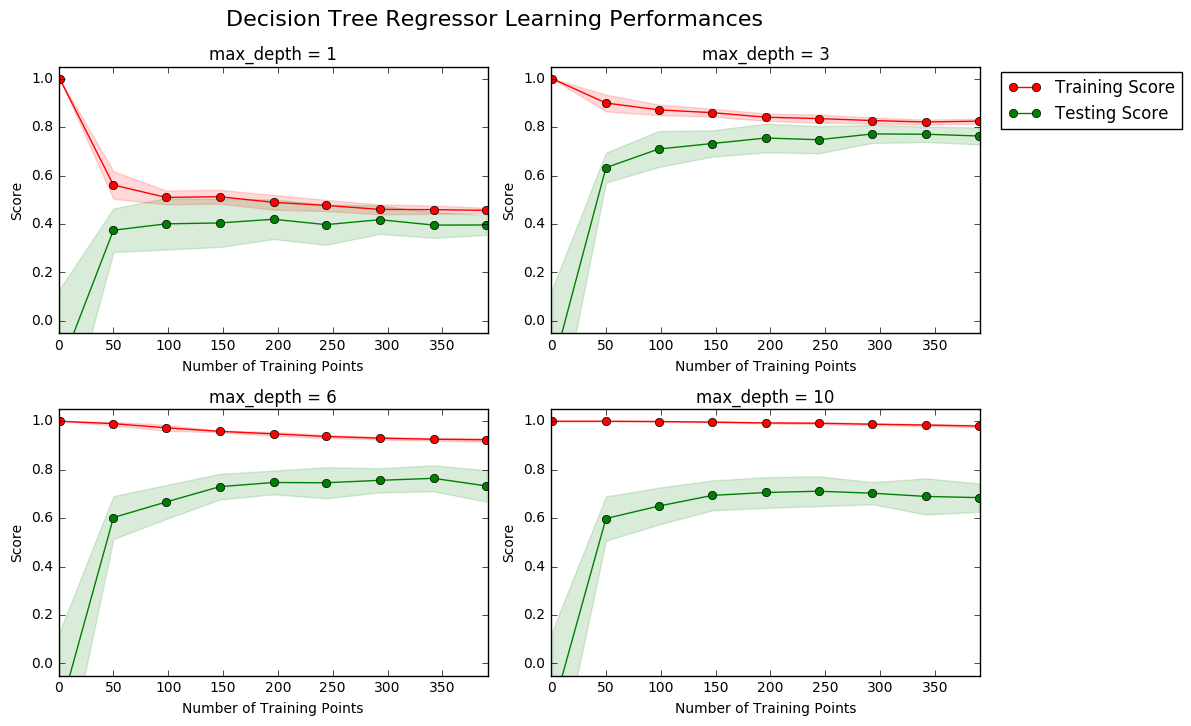

In [19]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

Max Depth of 3

As the number of training points increases, the training variation of a neighborhood's median home value explained by the model (coefficient of determiniation) decreases. Comparitively, as the number of training points increases, the testing variation of a neighborhood's median home value explained by the model increases. Having more training points (i.e. increases in the number of training points until convergence) benefits the model dramatically, as the accuracy of the model is based off of the testing data set. The uncertainty of the testing curve also decreases as the number of training points increases, re-assuring that prior to the testing score converging, the higher the number of training points, the better the model is performing.

Having more training points than the total number shown on the x-axis of each learning curve plot wouldn't benefit the model, regardless of the model's complexity. The reason for this is because each testing curve tends to converge by the point in which we reach our set maximum number of training points, and thus wouldn't show any improvement by adding more training points as the model's performance is based off of the testing scores.   

As a quick side note: The reason I chose the max. depth of 3 is because it visually appears to be the optimal depth of choice (out of the 4 choices above). The coefficient of determination for the testing curve is at its highest while the uncertainty of the testing curve is at its lowest. The coefficient of determination for the training curve suffers, though it does seem to converge with the testing curve, also indicating that this would be the best model of choice (i.e. using a max depth of 3).

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

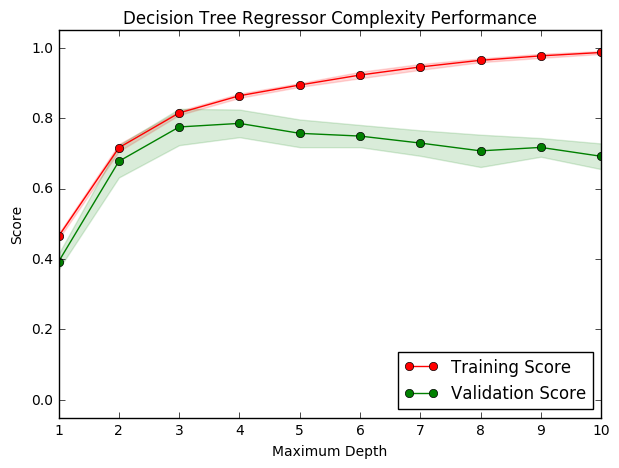

In [20]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

When the model is trained with a maximum depth of 1, it suffers from high bias. Alternatively, when the model is trained with a maximum depth of 10, it suffers from high variance. Typically, as a model's complexity increases, the bias drops and the variance increases. This can be seen visually, where the max depth of 1 shows the training and validation scores to have converged but are not at an optimal height. For the max depth of 10, the variance can be seen visually by the wide range in the gap between the training score and validation score. Because the max depth of 10 model is so complex, it would require more data for the validation score to even have a chance.

After looking at just the max depth of 1 and 10, we can assert that without adding more data into the model, we know the complexity must lay somewhere between the max depths of 1 and 10.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

The model using a maximum depth of 3 suggests that it may be best at generalizing to unseen data. I base this answer off of the bias-variance trade-off by looking at the learning curves and complexity curves. This maximum depth shows the training and testing curves to converge at similar values, with the smallest gap between them and where our performance on our testing set is at its highest. As an added bonus to this, the uncertainty of the testing scores appear to be at its lowest with this maximum depth.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

The grid search technique assesses all combinations of the model input parameters to find the best combination for a machine learning algorithm. Using this method helps to fine-tune the hyperparameters so that you are obtaining your optimal algorithm. This is done by choosing the set of hyperparameters from an exhaustive set of cominations that optimize the algorithm's performance on an independent, or testing, data set using cross validation as the performance metric. 

For very complex models with many parameters, this method may be very time consuming and computationally expensive. I assume people might prefer randomized search over grid search in some occations because using a set number of trials for hyperparameter searching would be computationally inexpensive and from what I've read, still likely to find close to optimal.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

The k-fold cross-validation training technique runs k iterations of randomly splitting the data for training and testing. The performance is then averaged over these k iterations to account for every split. The biggest advantage to using this method is that it validates the performance of your algorithm by eventually using all of the data for BOTH training and testing.

Without having a cross-validated set, using the grid search technique may find the optimal parameters for one particular split's performance, but may not apply to the performance of another randomly generated split on the data. Additionally, this could indicate that these parameters may not be optimal for new data.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_iter'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [21]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth":range(1, 11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor,param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [22]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


The optimal maximum depth for the decision tree regressor is 4. This is very close to what I visually estimated in Question 6, which was 3. Even though I was able to estimate the optimal maximum depth visually within 1, this step is clearly more reliable for determining this optimal parameter. Because the visual got me so close, it is safe to say that learning curves and complexity curves are very telling of a model's performance.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [23]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $407,232.00
Predicted selling price for Client 2's home: $229,200.00
Predicted selling price for Client 3's home: $979,300.00


Recall our Descriptives:
Statistics for Boston housing dataset:

Minimum price: \$105,000.00
Maximum price: \$1,024,800.00
Mean price: \$454,342.94
Median price \$438,900.00
Standard deviation of prices: \$165,171.13

min rooms: 3.56
max rooms: 8.40
Mean rooms: 6.24
Median rooms 6.18
Standard deviation of rooms: 0.64

min LSTAT: 1.98
max LSTAT: 37.97
Mean LSTAT: 12.94
Median LSTAT 11.69
Standard deviation of LSTAT: 7.07

min PTRATIO: 12.60
max PTRATIO: 22.00
Mean PTRATIO: 18.52
Median PTRATIO 19.10
Standard deviation of PTRATIOs: 2.11

Note: After updating to use numpy rather than pandas for descriptive stats, the finding below still hold.




I would say that our predicted prices for each client's home are reasonable and I would recommend each client sell his/her home at the price our optimal model has found. This would mean that:
- Client 1 sells their house for \$407,232
- Client 2 sells their house for \$229,200
- Client 3 sells their house for \$979,300

I am coming to this conclusion based on the descriptive statistics that were calculated previously: 

Client 1:
The first client will be selling their house for a value just below (while still within one standard deviation) the average home value. This seems logical as they also have just below the average number of rooms (more than one standard deviation) and are living in a neighborhood that is just above the average poverty percentage, though under a standard deviation higher. They are below the average student-teacher ratio by more than a standard deviation (which is a positive thing), and so their predicted value seems reasonable overall.

Client 2:
The second client will be selling their house for a value more than one standard deviation below the average home value. To me, this seems logical as well because they also have within one standard deviation away from the minimum number of rooms, are living in a neighborhood that is within one standard deviation away from the maximum poverty percentage, and have the maximum student-teacher ratio. Because of these overall comparisons, it is acceptable that they sell their house for $229,200 (even though that still mgiht be generous).


Client 3:
The third client will be selling their home for a value within one standard deviation from the maximum home value. This is more than reasonable given that they ahave a home that basically fits the standard ideal descriptive stats (i.e. a lot of rooms, low poverty perctentage and a low student to teacher ratio, all in comparison to the descriptive statistics). 

My decision to suggest these sale values is based off of the data in the data set and the assumption that it is still accurate for purposes of the exercise (given that it is an older dataset).



### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [24]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

Even though my answer to question 10 suggests that each client sell their home for the respective predicted price, I wouldn't actually consider the model for a real-world setting and here is why - 

Point 1:
I live in the South Side of Pittsburgh and according to Trulia, the trend for the median home sales price for my neighborhood between January of 2000 and July of 2016 went from roughly \$85k in 2000 to \$223k in 2016. This difference alone is enough to ignore the idea that the model may be worth implementing in today's market. Regardless of the fact that this was for a Pittsburgh neighborhood, this 16-year difference expresses enough change that a model built using a 40-year old dataset (no matter the U.S. neighborhood) should be disregarded for using in a real-world setting.

Trulia Link: https://www.trulia.com/real_estate/Southside_Flats-Pittsburgh/5908/market-trends/

Point 2:
I also don't believe that the number of rooms in a house, the poverty percentage, and the average student to teacher ratio in nearby schools is remotely enough to determine the price of a house, regardless of how current the data is. Even if a model is accurate in its predictions, I don't think that the final judgement call on the selling price of any home should ever be based off of it. 

Point 3:
Though we have chosen the optimal parameters for our model's performance, we are not necessarily consistent with our predictions and therefore our model does not seem too robust. A good way to look at this is to consider our range of \$69,044.61 in our predictions. Another way of looking at this statistic is asking the question of what proportion does our minimum value have in regards to our maximum value? And the answer to that is that our minimum predicted price is only roughly four-fifths of our maximum predicted price, and so by using this model, you could potentially miss out on up to a fifth of what your home is realistically worth.

Point 4:
Finally, the data collected in an urban city like Boston would not be applicable in a rural city, arguably like most areas around Pittsburgh. The cost of living is far too influential in the real estate world to apply models built on Boston data across other cities. 

Building a model would definitely give a competitive edge in the market, however, it should only be used as a set of "guidelines" to pricing the house, rather than a final decision.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.